In [61]:
import os
import sys
import warnings
from tqdm import tqdm

import numpy as np
from skimage.io import imread, imshow, imsave

In [62]:
# Initialization

PATH = 'F:\\MA\\data\\NIH\\Ls\\20180717_161620(new_Ls)\\label\\mask\\SegmentationClassPNG\\'
dirName = PATH + 'out-cell\\'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

# Create target Directory if don't exist
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

    
IMG_ID = next(os.walk(PATH))[2]
#IMG_WIDTH = 400
#IMG_HEIGHT = 400

Directory  F:\MA\data\NIH\Ls\20180717_161620(new_Ls)\label\mask\SegmentationClassPNG\out-cell\  Created 


In [1]:
def label_to_mask(label):
    mask = np.zeros([label.shape[0], label.shape[1]])
    
    for x in range(label.shape[0]):
        for y in range(label.shape[1]):
            for c in range(label.shape[2]):
                if label[x,y,c] == 128:
                    mask[x,y] = c+1
                    
    return mask.astype('uint8')

In [64]:
#MASK = np.zeros((len(IMG_ID), IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)
MASK = []

# Transfer images
print('Transferring images ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(IMG_ID), total=len(IMG_ID)):
    
    label = imread(PATH + id_)
    mask = label_to_mask(label)
    MASK.append(mask)
    imsave(dirName + IMG_ID[n], mask)
        
print('Done!')

Transferring images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [01:20<00:00,  1.22s/it]


Done!


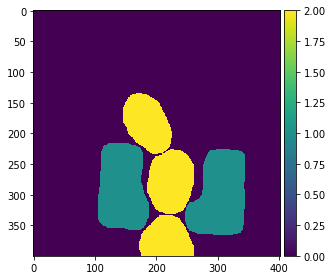

In [69]:
# Sanity test
imshow(MASK[18])